Import required Packages

In [1]:
from keras.datasets import cifar10
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping


Define utility functions

In [2]:
def display_images(original, decoded, count = 10): 
    n = count
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # show original input image
        ax = plt.subplot(2, n, i+1)
        plt.imshow(original[300*i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display decoded image
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(decoded[300*i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    

Load CIFAR-10 data set

In [3]:
(x_train, _), (x_test, _) = cifar10.load_data()

Print train and test data and size

In [4]:
print("train data", x_train.shape)
print("test data", x_test.shape)

batch_size = 50
img_width, img_height, img_channels = 32, 32, 3
no_classes = 10
no_epochs = 50

train data (50000, 32, 32, 3)
test data (10000, 32, 32, 3)


normalize the data &
build Autoencoder pipeline & display model summary

In [5]:
#define the input shape
input_img = Input(shape = (img_width, img_height, img_channels))

# convert to float32 format
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data
x_train = x_train / 255
x_test = x_test / 255


x = Conv2D(64, (3, 3), activation='relu', padding='same') (input_img)
x = MaxPooling2D((2, 2)) (x)

x = Conv2D(32, (3, 3), activation='relu', padding='same') (x)
x = MaxPooling2D((2, 2)) (x)

x = Conv2D(16, (3, 3), activation='relu', padding='same') (x)
#x = MaxPooling2D((2, 2)) (x)

x = Conv2D(8, (3, 3), activation='relu', padding='same') (x)
encoded = MaxPooling2D((2, 2)) (x)

x = Conv2D(8, (3, 3), activation='relu', padding='same') (encoded)
x = UpSampling2D((2, 2)) (x)

x = Conv2D(16, (3, 3), activation='relu', padding='same') (x)
x = UpSampling2D((2, 2)) (x)

x = Conv2D(32, (3, 3), activation='relu', padding='same') (x)
x = UpSampling2D((2, 2)) (x)

x = Conv2D(64, (3, 3), activation='relu', padding='same') (x)
#x = UpSampling2D((2, 2)) (x)

decoded = Conv2D(3, (3, 3), padding='same') (x)

cae = Model(input_img,decoded)
cae.compile(optimizer = 'adam', loss ='mse', metrics=['accuracy'] )
cae.summary()




Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          4624      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           1160  

In [6]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


compile the model

In [7]:
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

np.random.seed(123)
history = cae.fit(x_train,x_train,
           epochs = 100,
           batch_size = 50,
           validation_data = (x_test, x_test),
           callbacks=[early_stopping_monitor])



Epoch 1/100
1000/1000 [==============================] - 24s 22ms/step - loss: 0.0220 - accuracy: 0.5379 - val_loss: 0.0145 - val_accuracy: 0.6112
Epoch 2/100
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0133 - accuracy: 0.6267 - val_loss: 0.0121 - val_accuracy: 0.6457
Epoch 3/100
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0119 - accuracy: 0.6384 - val_loss: 0.0114 - val_accuracy: 0.6488
Epoch 4/100
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0112 - accuracy: 0.6459 - val_loss: 0.0108 - val_accuracy: 0.6591
Epoch 5/100
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0107 - accuracy: 0.6591 - val_loss: 0.0105 - val_accuracy: 0.6961
Epoch 6/100
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0102 - accuracy: 0.6975 - val_loss: 0.0101 - val_accuracy: 0.7085
Epoch 7/100
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0098 - accuracy: 0.7104 - val_loss: 0

accuracy and loss metrics

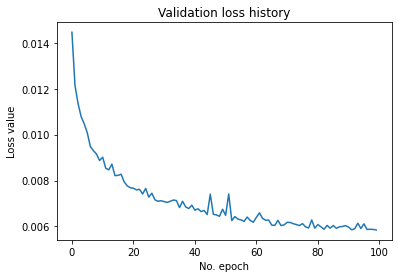

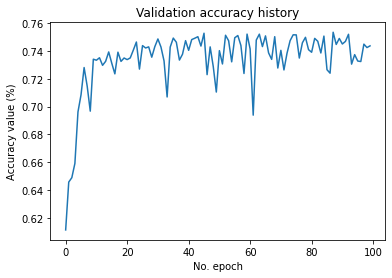

In [8]:
#score = cae.evaluate(x_train, x_train, verbose=0)
#print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

show input and decoded images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


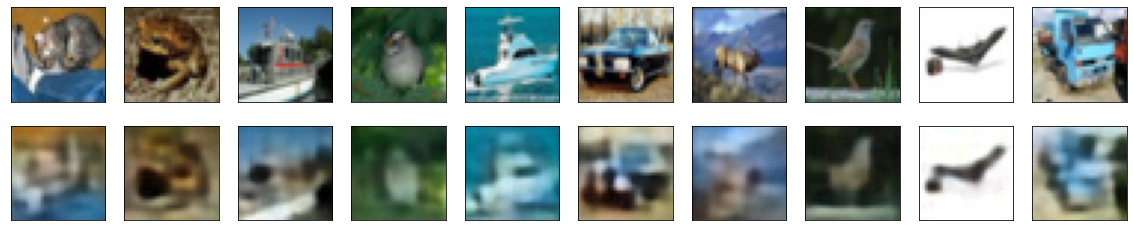

In [9]:
decoded_data = cae.predict(x_test)
display_images(x_test, decoded_data)